In [1]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms

hyperparams = {
    "batch_size": 4,
    "learning_rate": 0.0001,
    "epochs": 5,
    "transform": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.48235, 0.45882, 0.40784],
                std=[0.229, 0.224, 0.225]
            )
        ]
    )
}

train_dataset = ImageFolder("../datasets/pet/train", transform=hyperparams["transform"])
test_dataset = ImageFolder("../datasets/pet/test", transform=hyperparams["transform"])

train_dataloader = DataLoader(train_dataset, 
                              batch_size=hyperparams["batch_size"], 
                              shuffle=True, 
                              drop_last=True)

test_dataloader = DataLoader(test_dataset, 
                             batch_size=hyperparams["batch_size"], 
                             shuffle=True, 
                             drop_last=True)

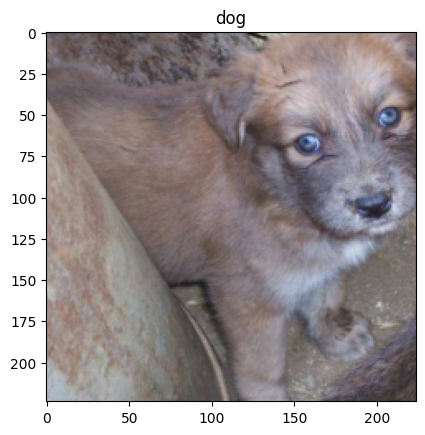

In [4]:
import numpy as np
from matplotlib import pyplot as plt

mean=[0.48235, 0.45882, 0.40784]
std=[0.229, 0.224, 0.225]

images, labels = next(iter(train_dataloader))
for image, label in zip(images, labels):
    image = image.numpy().transpose((1, 2, 0))
    image = ((std * image + mean) * 255).astype(np.uint8)

    plt.imshow(image)
    plt.title(train_dataset.classes[int(label)])
    plt.show()
    break

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----------- ---------------------------- 2.4/8.1 MB 12.2 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 15.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 13.6 MB/s  0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 16.5 MB/s  0:00:00

   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   -------------------------- ------------- 4/6 [contourpy]
   ----------------